##**Loksabha Election 2019  Results Analysis and Prediction using Supervised Machine Learning**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install --upgrade jupyter_core jupyter_client
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: jupyter_core in /usr/local/lib/python3.7/dist-packages (4.7.1)
     |████████████████████████████████| 122kB 12.1MB/s 
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

##Reading Dataset

In [ ]:
df = pd.read_csv('/content/Election_2019.csv')

In [ ]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


# Preprocessing and  EDA

In [ ]:
df.shape

(2263, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [ ]:
# renaming column names
df = df.rename(columns={'CRIMINAL\nCASES': 'CRIMINAL_CASES', 'GENERAL\nVOTES': 'GENERAL_VOTES', 'POSTAL\nVOTES': 'POSTAL_VOTES', 'TOTAL\nVOTES': 'TOTAL_VOTES', 'OVER TOTAL ELECTORS \nIN CONSTITUENCY': 'OVER_TOTAL_ELECTORS_IN_CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY': 'OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY', 'TOTAL ELECTORS': 'TOTAL_ELECTORS'})

# drop rows with NA values
df = df[df['GENDER'].notna()]

# replace Nil values with 0
df['ASSETS'] = df['ASSETS'].replace(['Nil', '`', 'Not Available'], '0')
df['LIABILITIES'] = df['LIABILITIES'].replace(['NIL', '`', 'Not Available'], '0')
df['CRIMINAL_CASES'] = df['CRIMINAL_CASES'].replace(['Not Available'], '0')

# clean ASSETS and LIABILITIES column values
df['ASSETS'] = df['ASSETS'].map(lambda x: x.lstrip('Rs ').split('\n')[0].replace(',', ''))
df['LIABILITIES'] = df['LIABILITIES'].map(lambda x: x.lstrip('Rs ').split('\n')[0].replace(',', ''))

# convert ASSETS, LIABILITIES and CRIMINAL_CASES column values into numeric
df['ASSETS'] = df['ASSETS'].astype(str).astype(float)
df['LIABILITIES'] = df['LIABILITIES'].astype(str).astype(float)
df['CRIMINAL_CASES'] = df['CRIMINAL_CASES'].astype(str).astype(int)

# reorder columns
cols = df.columns.tolist()
cols = cols[0:3] + cols[4:] + cols[3:4]
df = df[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2018 non-null   object 
 1   CONSTITUENCY                             2018 non-null   object 
 2   NAME                                     2018 non-null   object 
 3   PARTY                                    2018 non-null   object 
 4   SYMBOL                                   2018 non-null   object 
 5   GENDER                                   2018 non-null   object 
 6   CRIMINAL_CASES                           2018 non-null   int64  
 7   AGE                                      2018 non-null   float64
 8   CATEGORY                                 2018 non-null   object 
 9   EDUCATION                                2018 non-null   object 
 10  ASSETS                                   2018 no

#Visualizations

In [ ]:
st_con=df.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='Constituency')

Text(0.5, 1.0, 'Top 10 States with highest number of Constituencies - 2019')

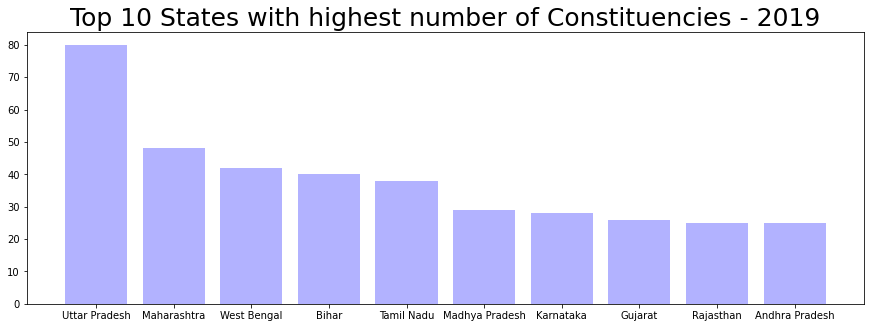

In [ ]:
st_con = st_con.sort_values(by=['Constituency'],ascending=False)
plt.figure(figsize=(15,5))
plt.bar(st_con.STATE.head(10),st_con.Constituency.head(10),color = 'b', alpha = 0.3)
plt.title('Top 10 States with highest number of Constituencies - 2019',fontsize=25)


In [ ]:
party_counts=df.groupby('STATE').apply(lambda x:x['PARTY'].nunique()).reset_index(name='party_count')
party_counts

,STATE,party_count
0,Andaman & Nicobar Islands,5
1,Andhra Pradesh,8
2,Arunachal Pradesh,6
3,Assam,11
4,Bihar,43
5,Chandigarh,4
6,Chhattisgarh,9
7,Dadra & Nagar Haveli,4
8,Daman & Diu,3
9,Goa,3


Text(0.5, 1.0, 'Top 10 States with highest number of parties competeting - 2019')

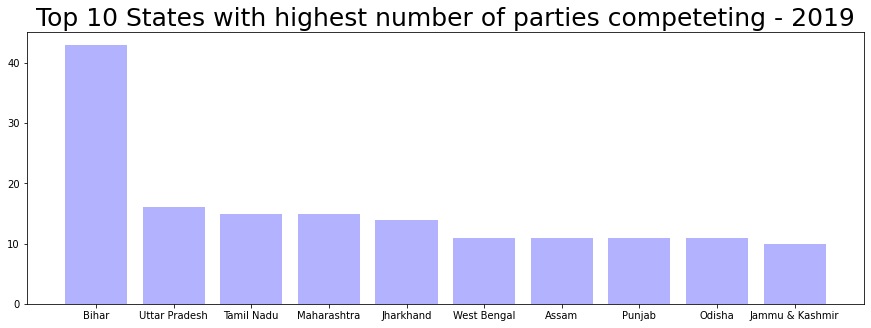

In [ ]:
party_counts = party_counts.sort_values(by=['party_count'],ascending=False)
plt.figure(figsize=(15,5))
plt.bar(party_counts.STATE.head(10),party_counts.party_count.head(10),color = 'b', alpha = 0.3)
plt.title('Top 10 States with highest number of parties competeting - 2019',fontsize=25)

In [ ]:
parties = df["PARTY"].value_counts()
parties

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
         ... 
ASDC        1
BLRP        1
TJS         1
BVA         1
AIPF        1
Name: PARTY, Length: 132, dtype: int64

Text(0.5, 1.0, 'Gender v/s Win and Lose')

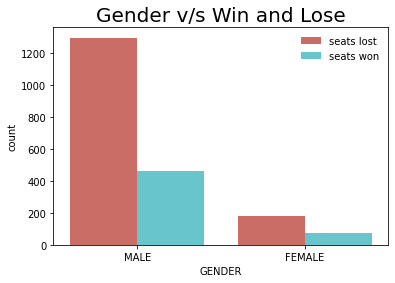

In [ ]:
ax = sns.countplot(data=df,x='GENDER',hue='WINNER',palette='hls')
ax.legend(['seats lost','seats won'],frameon=False)
plt.title("Gender v/s Win and Lose", fontsize=20)

Text(0.5, 1.0, 'Top 10 parties with number of seats contesting')

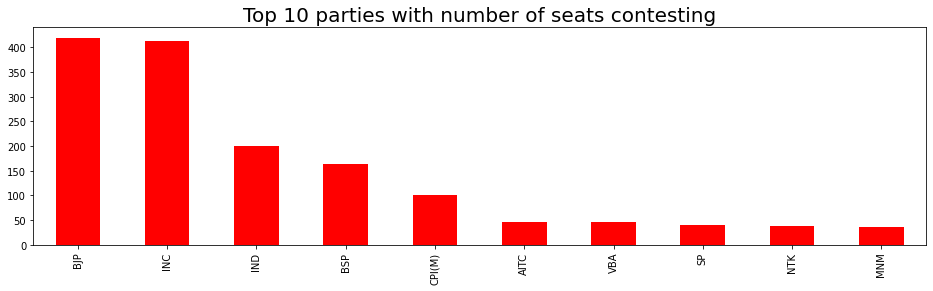

In [ ]:
ax=df['PARTY'].value_counts().head(10).plot.bar(
figsize=(16,4),
color='red'
)
plt.title("Top 10 parties with number of seats contesting",fontsize=20)

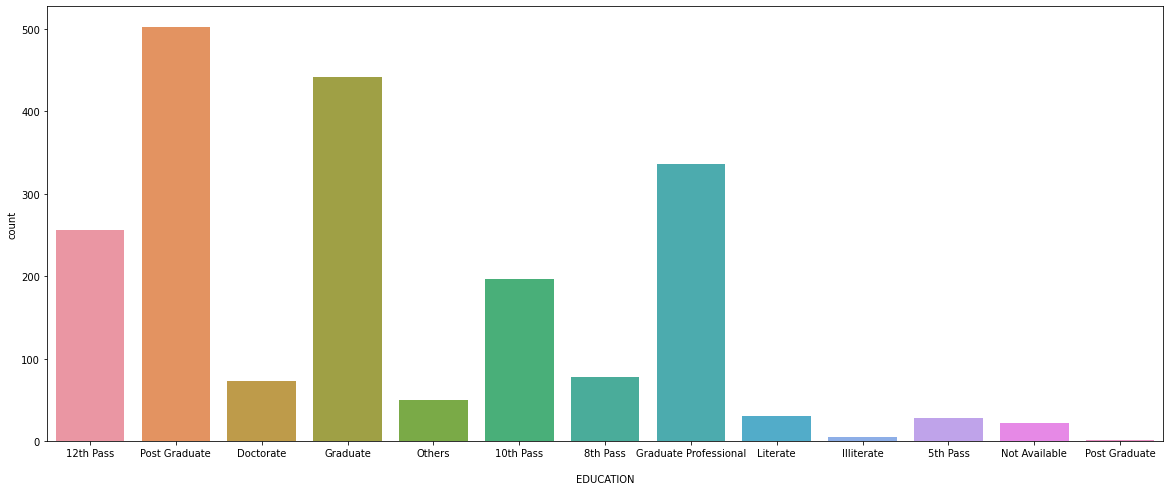

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='EDUCATION')

In [ ]:
df.describe()

,CRIMINAL_CASES,AGE,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY,TOTAL_ELECTORS,WINNER
count,2018.000000,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2.018000e+03,2018.000000
mean,1.453915,52.273538,1.315849e+08,1.973860e+07,2.911903e+05,1105.111001,2.922954e+05,17.596810,25.808492,1.660261e+06,0.267096
std,7.636973,11.869373,4.122697e+08,8.945292e+07,2.545964e+05,1661.283371,2.555874e+05,14.886247,21.403985,3.164246e+05,0.442553
min,0.000000,25.000000,0.000000e+00,0.000000e+00,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04,0.000000
25%,0.000000,43.250000,6.272526e+06,0.000000e+00,3.047625e+04,97.000000,3.074375e+04,1.953617,2.870669,1.530404e+06,0.000000
50%,0.000000,52.000000,2.404181e+07,9.039245e+05,2.846300e+05,463.000000,2.855250e+05,18.036861,27.749894,1.679891e+06,0.000000
75%,1.000000,61.000000,9.152498e+07,6.097971e+06,5.058620e+05,1545.500000,5.076175e+05,30.708115,44.349684,1.823404e+06,1.000000
max,240.000000,86.000000,8.950179e+09,1.547511e+09,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06,1.000000


From above we can notice that minimum age of a candidate is 25

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)

In [ ]:
num_df.head()

,CRIMINAL_CASES,AGE,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY,TOTAL_ELECTORS,WINNER
0,52,52.0,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,1
1,0,54.0,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790,0
2,3,52.0,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790,0
4,5,58.0,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,1
5,0,47.0,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,0


In [ ]:
def f(x):
    global df
    plt.hist(df[x])
    plt.title("Distribution",fontsize=20)
interact(f,x=num_df) 

interactive(children=(Dropdown(description='x', options=('CRIMINAL_CASES', 'AGE', 'ASSETS', 'LIABILITIES', 'GE…

<function __main__.f>

0    1479
1     539
Name: WINNER, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


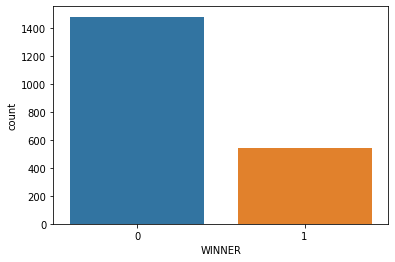

In [ ]:
print(df['WINNER'].value_counts())
sns.countplot("WINNER",data=df)

In [ ]:
winparty = df[df['WINNER']==1]


Text(0.5, 1.0, 'Top 10 parties with number of most seats won')

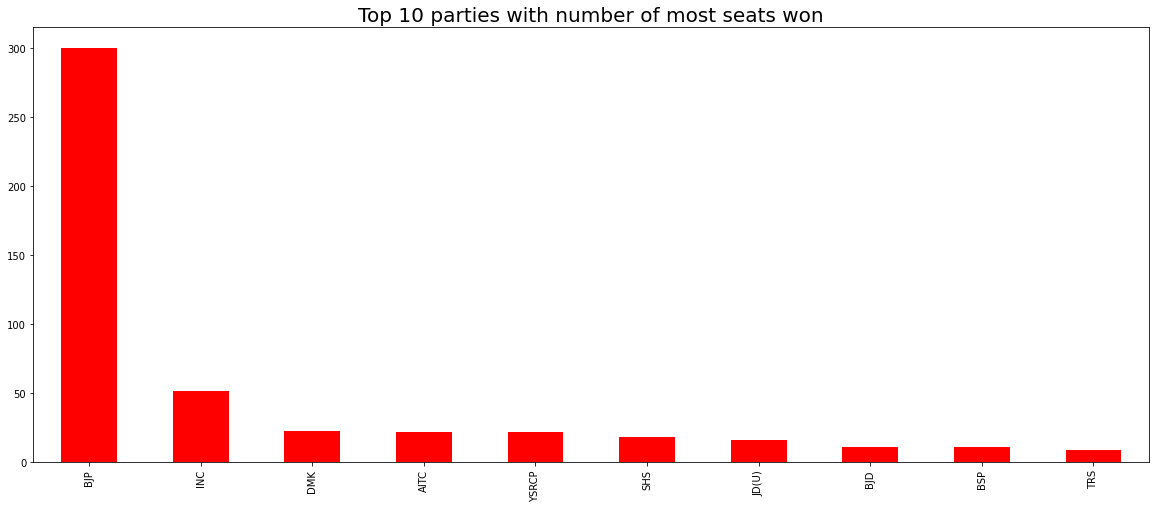

In [ ]:
ax=winparty['PARTY'].value_counts().head(10).plot.bar(
figsize=(20,8),
color='red'
)
plt.title("Top 10 parties with number of most seats won",fontsize=20)

Text(0.5, 1.0, 'Pie Chart for Top 10 parties with most seats Won')

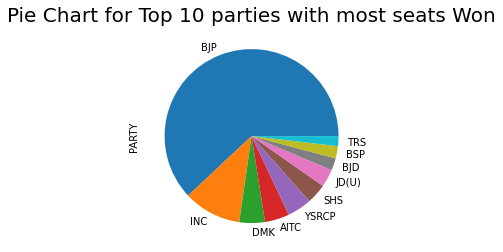

In [ ]:
ax = winparty['PARTY'].value_counts().head(10)
ax.plot.pie()
plt.title("Pie Chart for Top 10 parties with most seats Won",fontsize=20)

Text(0.5, 1.0, 'Qualification of candidates')

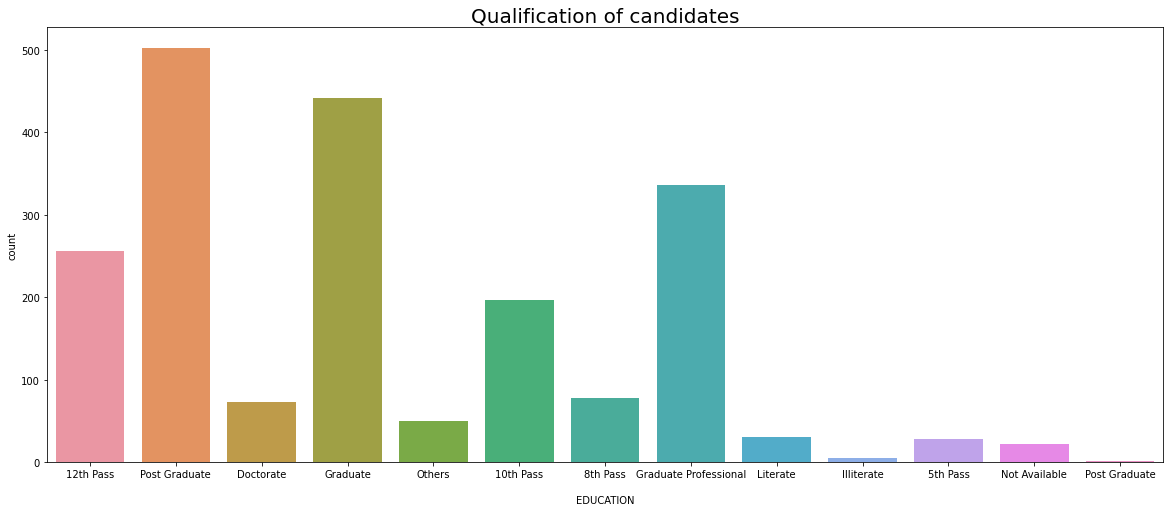

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='EDUCATION')
plt.title("Qualification of candidates",fontsize=20)

Text(0.5, 1.0, 'Qualification of elected candidates')

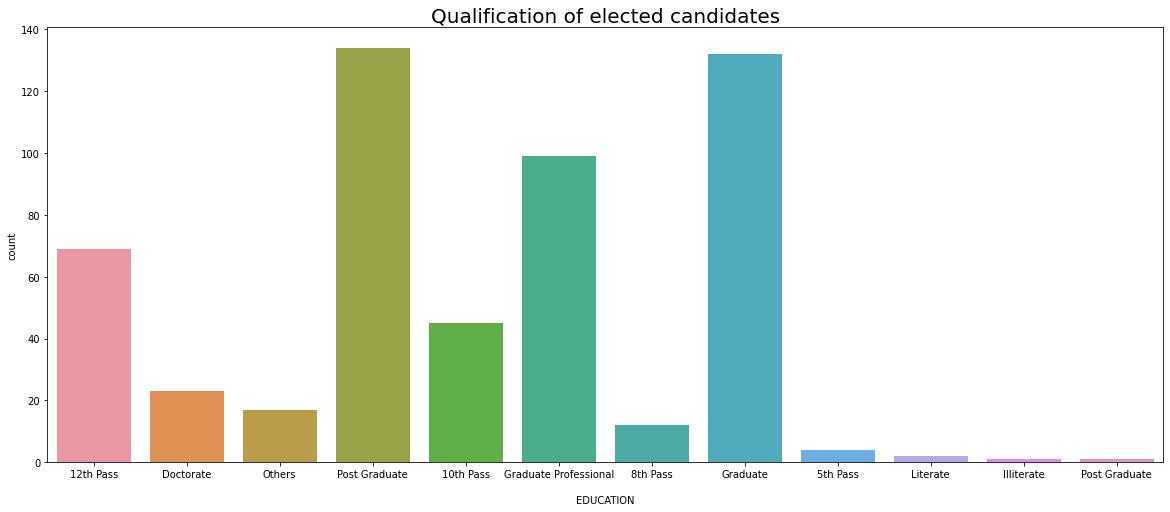

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=winparty,x='EDUCATION')
plt.title("Qualification of elected candidates",fontsize=20)

In [ ]:
party_df = df.drop(['CONSTITUENCY','NAME', 'PARTY', 'SYMBOL', 'GENDER','CATEGORY', 'EDUCATION','AGE','ASSETS', 'LIABILITIES'],axis=1)

In [ ]:
party_counts=party_df.groupby('STATE').sum('all').reset_index()

In [ ]:
crime = party_counts.sort_values(by='CRIMINAL_CASES',ascending=False)


Text(0.5, 1.0, 'Top 10 States with most number of criminal cases for candidates - 2019 Election ')

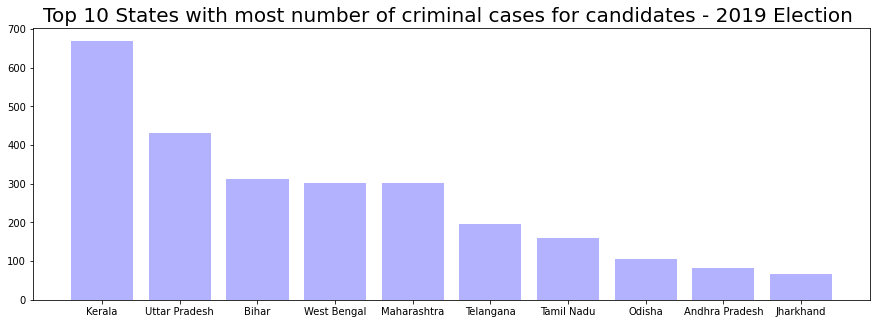

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(crime.STATE.head(10),crime.CRIMINAL_CASES.head(10),color = 'b', alpha = 0.3)
plt.title("Top 10 States with most number of criminal cases for candidates - 2019 Election ",fontsize=20)

In [ ]:
winner_crime = df[df['WINNER']==1]
winner_crime=winner_crime.groupby('STATE').sum('CRIMINAL_CASES').reset_index()
winner_crime=winner_crime.sort_values(by='CRIMINAL_CASES',ascending=False)

Text(0.5, 1.0, 'Top 10 States with most number of criminal cases for winning candidates - 2019 Election ')

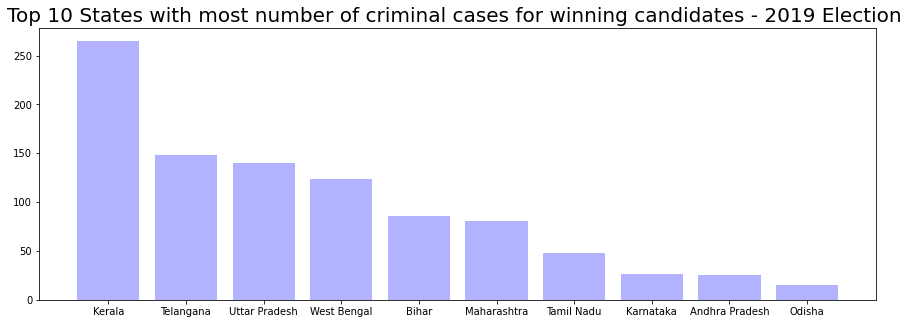

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(winner_crime.STATE.head(10),winner_crime.CRIMINAL_CASES.head(10),color = 'b', alpha = 0.3)
plt.title("Top 10 States with most number of criminal cases for winning candidates - 2019 Election ",fontsize=20)

In [ ]:
party_criminal = {}
gk = df.groupby('PARTY')
for name,group in gk:
    party_criminal[name] = group['CRIMINAL_CASES'].sum()

In [ ]:
party_criminal=pd.DataFrame(party_criminal.items(), columns=['Party', 'criminal_cases'])

In [ ]:
party_criminal = party_criminal.sort_values(by=['criminal_cases'],ascending=False)

Text(0.5, 1.0, 'Top 10 Parties with most number of criminal cases')

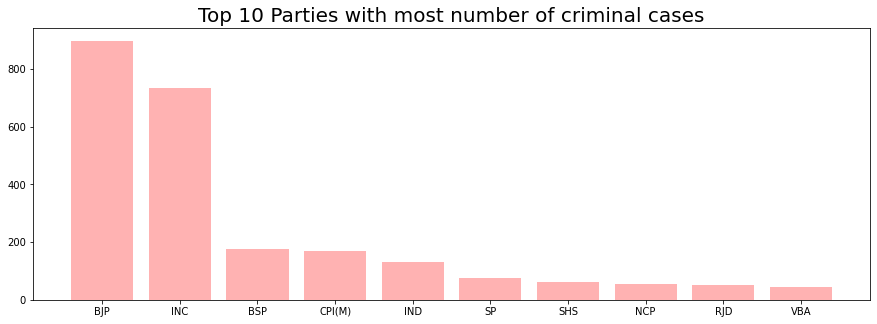

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(party_criminal.Party.head(10),party_criminal.criminal_cases.head(10),color = 'red', alpha = 0.3)
plt.title("Top 10 Parties with most number of criminal cases",fontsize=20)

In [ ]:
df.corr()

,CRIMINAL_CASES,AGE,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY,TOTAL_ELECTORS,WINNER
CRIMINAL_CASES,1.000000,-0.018752,-0.002315,0.002672,0.047591,0.010010,0.047471,0.060339,0.056959,-0.012796,0.035990
AGE,-0.018752,1.000000,0.094521,0.035221,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083,0.110294
ASSETS,-0.002315,0.094521,1.000000,0.568523,0.179242,0.108270,0.179251,0.166518,0.171897,0.073806,0.113585
LIABILITIES,0.002672,0.035221,0.568523,1.000000,0.136556,0.162972,0.137086,0.136384,0.136204,0.024895,0.109456
GENERAL_VOTES,0.047591,0.208567,0.179242,0.136556,1.000000,0.594395,0.999986,0.957413,0.958186,0.227139,0.714533
POSTAL_VOTES,0.010010,0.129360,0.108270,0.162972,0.594395,1.000000,0.598591,0.609817,0.614288,0.036731,0.500400
TOTAL_VOTES,0.047471,0.208600,0.179251,0.137086,0.999986,0.598591,1.000000,0.957664,0.958464,0.226497,0.715015
OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,0.060339,0.207304,0.166518,0.136384,0.957413,0.609817,0.957664,1.000000,0.974384,0.003023,0.729544
OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY,0.056959,0.223700,0.171897,0.136204,0.958186,0.614288,0.958464,0.974384,1.000000,0.073187,0.749932
TOTAL_ELECTORS,-0.012796,0.021083,0.073806,0.024895,0.227139,0.036731,0.226497,0.003023,0.073187,1.000000,0.036610


Dropping unnecessary columns 

In [ ]:
df.drop(columns=['CRIMINAL_CASES','AGE','ASSETS','LIABILITIES','TOTAL_ELECTORS','SYMBOL'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2018 non-null   object 
 1   CONSTITUENCY                             2018 non-null   object 
 2   NAME                                     2018 non-null   object 
 3   PARTY                                    2018 non-null   object 
 4   GENDER                                   2018 non-null   object 
 5   CATEGORY                                 2018 non-null   object 
 6   EDUCATION                                2018 non-null   object 
 7   GENERAL_VOTES                            2018 non-null   int64  
 8   POSTAL_VOTES                             2018 non-null   int64  
 9   TOTAL_VOTES                              2018 non-null   int64  
 10  OVER_TOTAL_ELECTORS_IN_CONSTITUENCY      2018 no

Outlier 

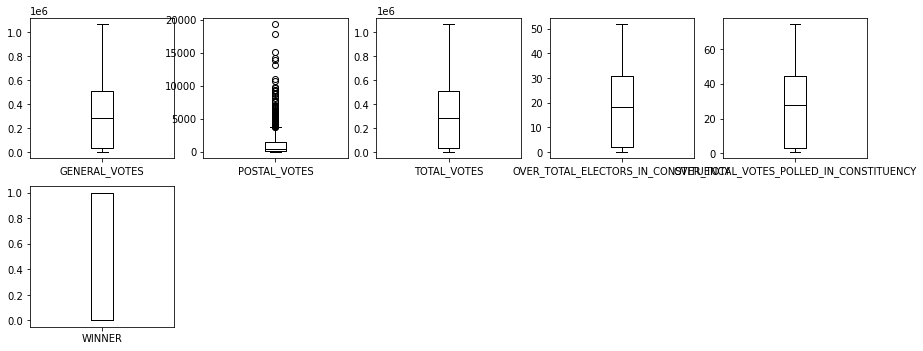

In [ ]:
df.plot( kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False,color='black',figsize=(15,15))
plt.show()

In [ ]:
Q1 = df['POSTAL_VOTES'].quantile(0.25)
Q3 = df['POSTAL_VOTES'].quantile(0.75)
IQR = Q3 - Q1
df = df[~ ((df['POSTAL_VOTES'] < (Q1 - 1.5 * IQR)) | (df['POSTAL_VOTES'] > (Q3 + 1.5 * IQR)))]

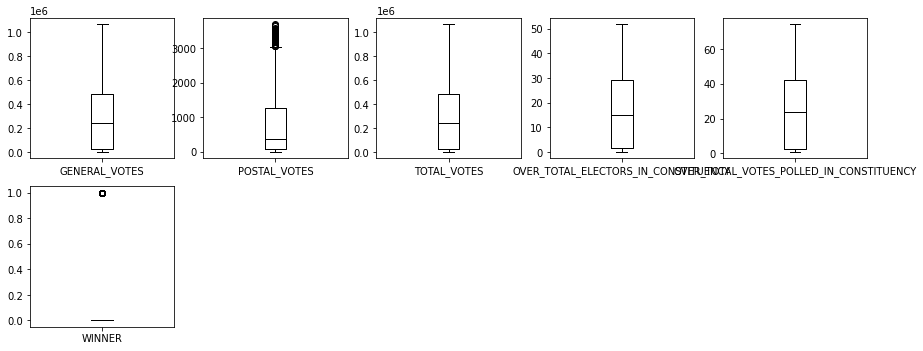

In [ ]:
df.plot( kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False,color='black',figsize=(15,15))
plt.show()

## Ordinal Encoding of Categorical columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()

In [ ]:
df[['STATE','CONSTITUENCY','NAME','PARTY','GENDER','CATEGORY','EDUCATION']]=ord.fit_transform(df[['STATE','CONSTITUENCY','NAME','PARTY','GENDER','CATEGORY','EDUCATION']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
df.head()

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY,WINNER
0,31.0,0.0,1606.0,26.0,1.0,2.0,1.0,376892,482,377374,25.330684,35.468248,1
1,31.0,0.0,654.0,116.0,1.0,2.0,11.0,318665,149,318814,21.399929,29.964370,0
2,31.0,0.0,1403.0,46.0,1.0,2.0,1.0,314057,181,314238,21.092771,29.534285,0
4,33.0,1.0,1678.0,26.0,1.0,1.0,4.0,644459,2416,646875,33.383823,56.464615,1
5,33.0,1.0,1053.0,35.0,1.0,1.0,11.0,434199,1130,435329,22.466390,37.999125,0


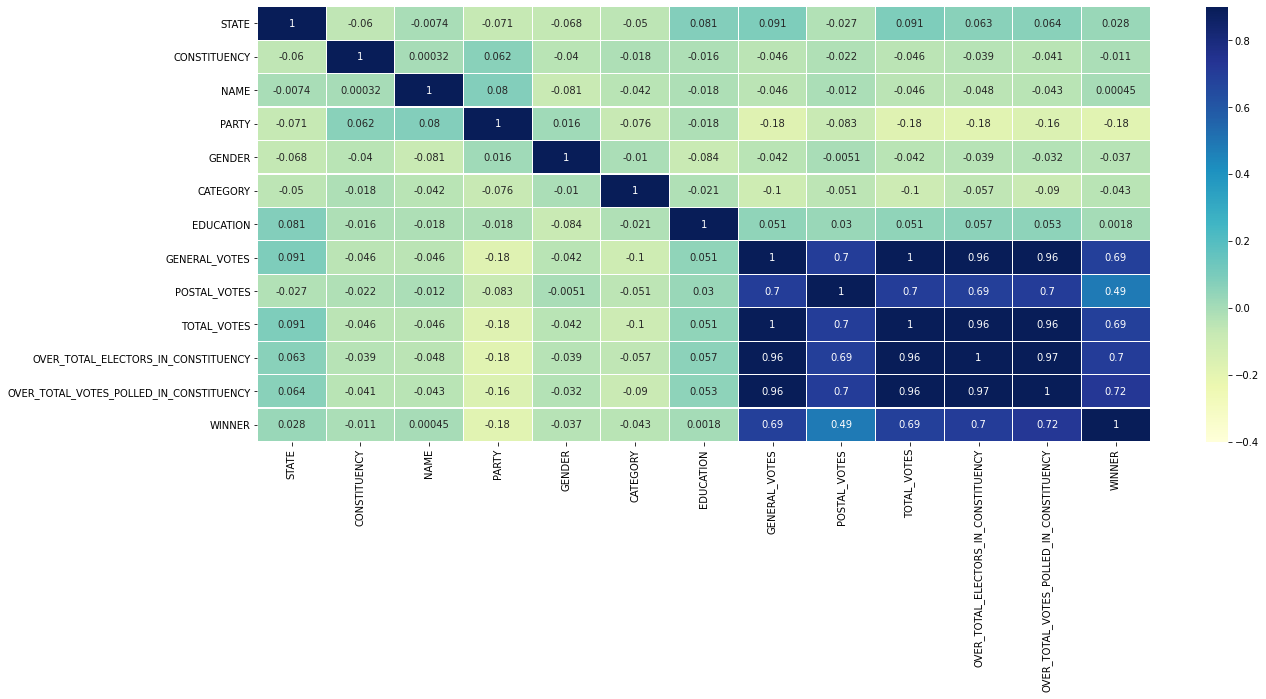

In [ ]:
corrmat=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmat,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
df_new=df[['GENERAL_VOTES','POSTAL_VOTES','TOTAL_VOTES','OVER_TOTAL_ELECTORS_IN_CONSTITUENCY','OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY','WINNER']]

In [ ]:
df_new.columns

Index(['GENERAL_VOTES', 'POSTAL_VOTES', 'TOTAL_VOTES',
       'OVER_TOTAL_ELECTORS_IN_CONSTITUENCY',
       'OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY', 'WINNER'],
      dtype='object')

## Splitting the data into test and train set

In [ ]:
X=df_new.drop(['WINNER'],axis=1)
y=df_new['WINNER']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,f1_score
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.3,stratify=y)

In [ ]:
from sklearn.metrics import log_loss

# **Model Building**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(Xtrain,ytrain)
ypred=logistic_model.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       438
           1       0.20      0.47      0.29       130

    accuracy                           0.46       568
   macro avg       0.47      0.46      0.43       568
weighted avg       0.62      0.46      0.50       568



In [ ]:
confusion_matrix(ytest,ypred)

array([[201, 237],
       [ 69,  61]])

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(Xtrain)
Xtest_sc = sc.transform(Xtest)
logistic_model.fit(Xtrain_sc,ytrain)
ypred_sc=logistic_model.predict(Xtest_sc)
print(classification_report(ytest,ypred_sc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       438
           1       0.92      0.88      0.90       130

    accuracy                           0.96       568
   macro avg       0.94      0.93      0.94       568
weighted avg       0.96      0.96      0.96       568



In [ ]:
confusion_matrix(ytest,ypred_sc)

array([[428,  10],
       [ 15, 115]])

In [ ]:
l_log1=log_loss(ytest,ypred_sc)
l_log1

1.5202067004349815

Hyper Parameter Tuning

In [ ]:
logistic_model_tuned=LogisticRegression(class_weight={0:2,1:3},penalty='l2',C=10.0)
logistic_model_tuned.fit(Xtrain_sc,ytrain)
ypred_tuned=logistic_model_tuned.predict(Xtest_sc)
print(classification_report(ytest,ypred_tuned))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       438
           1       0.87      0.91      0.89       130

    accuracy                           0.95       568
   macro avg       0.92      0.93      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
l_log2=log_loss(ytest,ypred_tuned)
l_log2

1.8242564869737052

In [ ]:
confusion_matrix(ytest,ypred_tuned)

array([[420,  18],
       [ 12, 118]])

**MinMAx scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xtrain_mm = mm.fit_transform(Xtrain)
Xtest_mm = mm.transform(Xtest)
logistic_model.fit(Xtrain_mm,ytrain)
ypred_mm=logistic_model.predict(Xtest_mm)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       438
           1       0.20      0.47      0.29       130

    accuracy                           0.46       568
   macro avg       0.47      0.46      0.43       568
weighted avg       0.62      0.46      0.50       568



In [ ]:
confusion_matrix(ytest,ypred_mm)

array([[423,  15],
       [ 21, 109]])

Minmax scaling is not effective in improving the model

There are more misclassifications in class 0 than in the model of scaled version

**KNN**

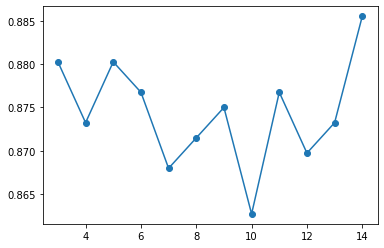

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors: 
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(Xtrain,ytrain)
    y_pred=classifier.predict(Xtest)
    acc=accuracy_score(ytest,y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')     # any value of neighbours at which accuracy is max can be considered.
classifier.fit(Xtrain,ytrain)
ypred=classifier.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       438
           1       0.74      0.74      0.74       130

    accuracy                           0.88       568
   macro avg       0.83      0.83      0.83       568
weighted avg       0.88      0.88      0.88       568



In [ ]:
confusion_matrix(ytest,ypred)

array([[404,  34],
       [ 34,  96]])

In [ ]:
classifier.fit(Xtrain_sc,ytrain)
y_pred=classifier.predict(Xtest_sc)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       438
           1       0.90      0.84      0.87       130

    accuracy                           0.94       568
   macro avg       0.93      0.91      0.92       568
weighted avg       0.94      0.94      0.94       568



In [ ]:
confusion_matrix(ytest,y_pred)

array([[426,  12],
       [ 21, 109]])

In [ ]:
classifier.fit(Xtrain_mm,ytrain)
y_pred=classifier.predict(Xtest_mm)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.92      0.85      0.88       130

    accuracy                           0.95       568
   macro avg       0.94      0.91      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,y_pred)

array([[429,   9],
       [ 20, 110]])

Standard Scaling has improved the performance of the KNN algorithm as it has reduced the misclassifications, MinMax scaling is also desirable and slightly improved compared to standard scaling.

In [ ]:
l_knn=log_loss(ytest,y_pred)

In [ ]:
l_knn

1.7634361123754965

**SVM**

In [ ]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear',probability=True)
svm_linear.fit(Xtrain_sc,ytrain)
ypred_svm=svm_linear.predict(Xtest_sc)
print(classification_report(ytest,ypred_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.92      0.87      0.89       130

    accuracy                           0.95       568
   macro avg       0.94      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_svm)

array([[428,  10],
       [ 17, 113]])

In [ ]:
svm_linear.fit(Xtrain_mm,ytrain)
ypred_svm1=svm_linear.predict(Xtest_mm)
print(classification_report(ytest,ypred_svm1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.85      0.89       130

    accuracy                           0.95       568
   macro avg       0.94      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_svm1)

array([[429,   9],
       [ 19, 111]])

In [ ]:
l_svm=log_loss(ytest,ypred_svm)
l_svm

1.641822110276216

Standard Scaling better in classification to minority class than MinMaxScaling.

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1,class_weight={0: 3, 1: 4})
dt.fit(Xtrain,ytrain)
ypred_dt=dt.predict(Xtest)
print(classification_report(ytest,ypred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       438
           1       0.87      0.85      0.86       130

    accuracy                           0.94       568
   macro avg       0.91      0.90      0.91       568
weighted avg       0.94      0.94      0.94       568



In [ ]:
confusion_matrix(ytest,ypred_dt)

array([[422,  16],
       [ 20, 110]])

In [ ]:
l_dt=log_loss(ytest,ypred_dt)
l_dt

2.1890999010135

Hyper Parameter tuning in Decision Tree

The hyperparameters are chosen as criterion and the max_depth of the tree. max_depth is considered as increasing it manually may lead to overfitting. The criterion considers the best method to calculate the information gain in a node.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    "criterion": ['gini','entropy'], 
    
    "max_depth": [2,4,6,8,10]
    
    
}
# Create an instance of grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 3, 1: 4},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [ ]:
dtt=DecisionTreeClassifier(random_state=1,class_weight={0: 3, 1: 4},criterion='entropy',max_depth=4)
dtt.fit(Xtrain,ytrain)
ypred_dtt=dt.predict(Xtest)
print(classification_report(ytest,ypred_dtt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       438
           1       0.87      0.85      0.86       130

    accuracy                           0.94       568
   macro avg       0.91      0.90      0.91       568
weighted avg       0.94      0.94      0.94       568



In [ ]:
confusion_matrix(ytest,ypred_dtt)

array([[422,  16],
       [ 20, 110]])

There is no improvement in the model with the tuning

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(Xtrain,ytrain)
ypred=rf.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.94      0.85      0.90       130

    accuracy                           0.95       568
   macro avg       0.95      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred)

array([[431,   7],
       [ 19, 111]])

Manual hyperparameter assignment 

In [ ]:
rf1=RandomForestClassifier(n_estimators=200,max_depth=5,random_state=1,criterion='entropy')
rf1.fit(Xtrain,ytrain)
ypred1=rf1.predict(Xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.85      0.89       130

    accuracy                           0.95       568
   macro avg       0.95      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred1)

array([[430,   8],
       [ 19, 111]])

In [ ]:
l_rf=log_loss(ytest,ypred1)
l_rf

1.6418192947923071

Scaling is not done since it has no effect on the random forest algorithm

Automatic Hyper Parameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)

cv- cross validation, can be chosen to be k=3,5 or 10. implements k-fold validation, k=10 can create higher penalty on execution time, k=3 is not satisfactory in small datasets, so a value between these k=5 is chosen

In [ ]:
rf_random.fit(Xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Displaying the best parameters 

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 2000}

**First Set of hyper parameters**

In [ ]:
rf_tuned=RandomForestClassifier(n_estimators=1566,max_depth=90,random_state=1,criterion='entropy',bootstrap= True,max_features= 'sqrt',min_samples_leaf=2,
 min_samples_split= 10)
rf_tuned.fit(Xtrain,ytrain)
ypred_tunerf=rf_tuned.predict(Xtest)
print(classification_report(ytest,ypred_tunerf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.88      0.90       130

    accuracy                           0.96       568
   macro avg       0.95      0.93      0.94       568
weighted avg       0.96      0.96      0.96       568



In [ ]:
confusion_matrix(ytest,ypred_tunerf)

array([[429,   9],
       [ 16, 114]])

Another set of parameters are chosen from the list of parameters in the RandomSearchCV to test the model.

**Second Set of hyperparameters**

In [ ]:
rf_tuned=RandomForestClassifier(n_estimators=50,max_depth=80,random_state=1,criterion='entropy',bootstrap= True,max_features= 'auto',min_samples_leaf=4,
 min_samples_split= 5)
rf_tuned.fit(Xtrain,ytrain)
ypred_tunerf=rf_tuned.predict(Xtest)
print(classification_report(ytest,ypred_tunerf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.86      0.90       130

    accuracy                           0.95       568
   macro avg       0.95      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_tunerf)

array([[430,   8],
       [ 18, 112]])

**Third set of hyper parameters**

In [ ]:
rf_tuned=RandomForestClassifier(n_estimators=800,max_depth=50,random_state=0,criterion='entropy',bootstrap= True,max_features= 'sqrt',min_samples_leaf=4,
 min_samples_split= 10)
rf_tuned.fit(Xtrain,ytrain)
ypred_tunerf1=rf_tuned.predict(Xtest)
print(classification_report(ytest,ypred_tunerf1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.92      0.88      0.90       130

    accuracy                           0.95       568
   macro avg       0.94      0.93      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_tunerf1)

array([[428,  10],
       [ 16, 114]])

In [ ]:
lrf_tuned=log_loss(ytest,ypred_tunerf1)
lrf_tuned

1.581014405355599

Fine tuning of random forest model

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create an instance of grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(Xtrain,ytrain)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf_tuned=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=1,criterion='entropy',bootstrap= True,max_features=3,min_samples_leaf=5,
 min_samples_split= 12)
rf_tuned.fit(Xtrain,ytrain)
ypred_tunerf1=rf_tuned.predict(Xtest)
print(classification_report(ytest,ypred_tunerf1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.92      0.88      0.90       130

    accuracy                           0.95       568
   macro avg       0.94      0.93      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_tunerf1)

array([[428,  10],
       [ 16, 114]])

The feature sets finaly considered are 

RandomForestClassifier(n_estimators=200,max_depth=10,random_state=1,criterion='entropy',bootstrap= True,max_features=3,min_samples_leaf=5,
 min_samples_split= 12) 

This gives the same classification metrics as the feature set with max_depth=5(Manual hyperparameter tuning)

The depth of the tree is better chosen as a small value as an increased value can lead to overfitting. Thus, the final tuned model is

RandomForestClassifier(n_estimators=200,max_depth=5,random_state=1,criterion='entropy')
The other features are not creating a big difference in the performance.




**GRADIENT BOOST ALGORITHM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1,n_estimators=15,max_depth=2,learning_rate=0.1,min_samples_split=15,max_features="sqrt")
gb.fit(Xtrain,ytrain)    
ypred_gb=gb.predict(Xtest)
print(classification_report(ytest,ypred_gb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.85      0.89       130

    accuracy                           0.95       568
   macro avg       0.94      0.91      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_gb)

array([[430,   8],
       [ 20, 110]])

In [ ]:
l_gb=log_loss(ytest,ypred_gb)
l_gb

1.7026269997129244

Good performance 

Hyper Parameter Tuning

In [ ]:
param_grid = {
     "n_estimators" :(10,15,20,25),
    "learning_rate" :(0.1,0.2),
     "min_samples_split":(10,15,18,20),
     "min_samples_leaf":(3,4,5),
     "max_depth":(3,4,5),
     "subsample": (0.6,0.8)
}
# Create an instance of grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   55.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=15,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=15,
                                                  n_iter_no...
                 

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 25,
 'subsample': 0.8}

In [ ]:
gb_tune=GradientBoostingClassifier(random_state=1,n_estimators=10,max_depth=4,learning_rate=0.2,min_samples_split=20,max_features="sqrt",subsample=0.8,min_samples_leaf=3)
gb_tune.fit(Xtrain,ytrain)
ypred_gbtune=gb_tune.predict(Xtest)
print(classification_report(ytest,ypred_gbtune))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.92      0.85      0.88       130

    accuracy                           0.95       568
   macro avg       0.94      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_gbtune)

array([[428,  10],
       [ 19, 111]])

In [ ]:
l_gbtuned = log_loss(ytest,ypred_gbtune)
l_gbtuned

1.763437520117451

No significant impact of Hyperparameter Tuning

**XG BOOST**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(Xtrain,ytrain)
ypred_xgb=xgb.predict(Xtest)
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.93      0.85      0.89       130

    accuracy                           0.95       568
   macro avg       0.94      0.92      0.93       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
confusion_matrix(ytest,ypred_xgb)

array([[429,   9],
       [ 19, 111]])

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(Xtrain,ytrain)
ypred_nb=nb.predict(Xtest)
print(classification_report(ytest,ypred_nb))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       438
           1       0.60      0.95      0.74       130

    accuracy                           0.85       568
   macro avg       0.79      0.88      0.81       568
weighted avg       0.89      0.85      0.86       568



In [ ]:
confusion_matrix(ytest,ypred_nb)

array([[357,  81],
       [  7, 123]])

In [ ]:
l_nb=log_loss(ytest,ypred_nb)
l_nb

5.351192060112652

Not a suitable model in this data

# **ROC**

In [ ]:
#Prediction probabilities for logistic regression with and without scaling
pred_prob1 = logistic_model.predict_proba(Xtest)
pred_prob2 = logistic_model.predict_proba(Xtest_mm)
pred_prob3 =logistic_model.predict_proba(Xtest_sc)
#Prediction probabilities for kNN with and without scaling
pred_prob4 = classifier.predict_proba(Xtest)
pred_prob5 = classifier.predict_proba(Xtest_sc)
pred_prob6 = classifier.predict_proba(Xtest_mm)
#Prediction probabilities for SVM with and without scaling
pred_prob7 = svm_linear.predict_proba(Xtest)
pred_prob8 = svm_linear.predict_proba(Xtest_sc)
pred_prob9 = svm_linear.predict_proba(Xtest_mm)
#Prediction Probabilities for Decision Tree classifier 
pred_prob10 = dt.predict_proba(Xtest)
#Prediction Probabilities for Random Forest classifier 
pred_prob11 = rf.predict_proba(Xtest)
#Prediction Probabilities for Gradient Boosting classifier 
pred_prob12 = gb.predict_proba(Xtest)
#Prediction Probabilities for Extreme Gradient Boosting classifier 
#pred_prob13 = xgb.predict_proba(Xtest)

In [ ]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thr1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thr2 = roc_curve(ytest, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thr3 = roc_curve(ytest, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thr4 = roc_curve(ytest, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thr5 = roc_curve(ytest, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thr6 = roc_curve(ytest, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thr7 = roc_curve(ytest, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thr8 = roc_curve(ytest, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thr9 = roc_curve(ytest, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thr10 = roc_curve(ytest, pred_prob10[:,1], pos_label=1)
fpr11, tpr11, thr11= roc_curve(ytest, pred_prob11[:,1], pos_label=1)
fpr12, tpr12, thr12 = roc_curve(ytest, pred_prob12[:,1], pos_label=1)
#fpr13, tpr13, thr13 = roc_curve(ytest, pred_prob13[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

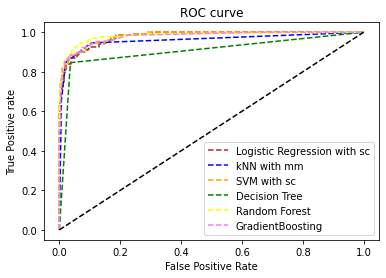

<Figure size 432x288 with 0 Axes>

In [ ]:

#plt.plot(fpr1, tpr1, linestyle='--',color='brown', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='gold', label='Logistic with mm')
plt.plot(fpr3, tpr3, linestyle='--',color='brown', label='Logistic Regression with sc')

#plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='kNN')
#plt.plot(fpr5, tpr5, linestyle='--',color='navy', label='kNN with sc')
plt.plot(fpr6, tpr6, linestyle='--',color='blue', label='kNN with mm')

#plt.plot(fpr7, tpr7, linestyle='--',color='bisque', label='SVM')
plt.plot(fpr8, tpr8, linestyle='--',color='orange', label='SVM with sc')
#plt.plot(fpr9, tpr9, linestyle='--',color='aquamarine', label='SVM with mm')

plt.plot(fpr10, tpr10, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr11, tpr11, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr12, tpr12, linestyle='--',color='violet', label='GradientBoosting')
#plt.plot(fpr13, tpr13, linestyle='--',color='royalblue', label='XGBoosting')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();
plt.savefig('Binary ROC',dpi=1000); 

**Cross-Validation**

In [ ]:
from numpy import mean
from numpy import std
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

**Logistic Regression Cross-Validation Scores**

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
accuracy1=np.mean(cross_val_score(logistic_model,X_sc,y,cv=kf,scoring='accuracy'))

In [ ]:
precision1    = np.mean(cross_val_score(logistic_model, X_sc,y, cv=kf, scoring='precision'))

In [ ]:
recall1       = np.mean(cross_val_score(logistic_model, X_sc,y, cv=kf, scoring='recall'))

In [ ]:
f1score1      = np.mean(cross_val_score(logistic_model, X_sc,y, cv=kf, scoring='f1'))

In [ ]:
 rocauc1       = np.mean(cross_val_score(logistic_model, X_sc, y, cv=kf, scoring='roc_auc'))

In [ ]:
 model1 = pd.DataFrame({'Model'        : ["Logistic Regression"],
                             'Accuracy'     : [accuracy1],
                             'Precision'    : [precision1],
                             'Recall'       : [recall1],
                             'F1score'      : [f1score1],
                             'ROCAUC'       : [rocauc1],
                       })   

In [ ]:
model1

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,Logistic Regression,0.946647,0.89311,0.873256,0.882647,0.98141


**Random Forest Model**

In [ ]:
accuracy2=np.mean(cross_val_score(rf1,X,y,cv=kf,scoring='accuracy'))

In [ ]:
precision2    = np.mean(cross_val_score(rf1, X,y, cv=kf, scoring='precision'))

In [ ]:
recall2       = np.mean(cross_val_score(rf1, X,y, cv=kf, scoring='recall'))

In [ ]:
f1score2      = np.mean(cross_val_score(rf1, X,y, cv=kf, scoring='f1'))

In [ ]:
 rocauc2       = np.mean(cross_val_score(rf1, X, y, cv=kf, scoring='roc_auc'))

In [ ]:
 model2 = pd.DataFrame({'Model'        : ["Random Forest"],
                             'Accuracy'     : [accuracy2],
                             'Precision'    : [precision2],
                             'Recall'       : [recall2],
                             'F1score'      : [f1score2],
                             'ROCAUC'       : [rocauc2],
                             
                               })   

In [ ]:
model2

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,Random Forest,0.945592,0.917889,0.838689,0.875943,0.980504


**SVM Model**

In [ ]:
accuracy3=np.mean(cross_val_score(svm_linear, X_sc,y, cv=kf, scoring='accuracy'))

In [ ]:
precision3    = np.mean(cross_val_score(svm_linear, X_sc,y, cv=kf, scoring='precision'))

In [ ]:
recall3       = np.mean(cross_val_score(svm_linear, X_sc,y, cv=kf, scoring='recall'))

In [ ]:
f1score3      = np.mean(cross_val_score(svm_linear, X_sc,y, cv=kf, scoring='f1'))

In [ ]:
 rocauc3       = np.mean(cross_val_score(svm_linear, X_sc, y, cv=kf, scoring='roc_auc'))

In [ ]:
 model3 = pd.DataFrame({'Model'        : ["SVM"],
                             'Accuracy'     : [accuracy3],
                             'Precision'    : [precision3],
                             'Recall'       : [recall3],
                             'F1score'      : [f1score3],
                             'ROCAUC'       : [rocauc3],
                             
                               })   

In [ ]:
model3

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,SVM,0.945065,0.900463,0.857135,0.87759,0.981313


**Gaussian Naive Bayes**

In [ ]:
accuracy4=np.mean(cross_val_score(nb,X,y,cv=kf,scoring='accuracy'))

In [ ]:
precision4    = np.mean(cross_val_score(nb, X,y, cv=kf, scoring='precision'))

In [ ]:
recall4       = np.mean(cross_val_score(nb, X,y, cv=kf, scoring='recall'))

In [ ]:
f1score4      = np.mean(cross_val_score(nb, X,y, cv=kf, scoring='f1'))

In [ ]:
 rocauc4       = np.mean(cross_val_score(nb, X, y, cv=kf, scoring='roc_auc'))

In [ ]:
 model4 = pd.DataFrame({'Model'        : ["Gaussian Naive Bayes"],
                             'Accuracy'     : [accuracy4],
                             'Precision'    : [precision4],
                             'Recall'       : [recall4],
                             'F1score'      : [f1score4],
                             'ROCAUC'       : [rocauc4],
                             
                               })   

In [ ]:
model4

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,Gaussian Naive Bayes,0.857354,0.628318,0.944767,0.753669,0.958165


**Decision Tree**

In [ ]:
accuracy5=np.mean(cross_val_score(dt,X,y,cv=kf,scoring='accuracy'))

In [ ]:
precision5    = np.mean(cross_val_score(dt, X,y, cv=kf, scoring='precision'))

In [ ]:
recall5       = np.mean(cross_val_score(dt, X,y, cv=kf, scoring='recall'))

In [ ]:
f1score5      = np.mean(cross_val_score(dt, X,y, cv=kf, scoring='f1'))

In [ ]:
 rocauc5       = np.mean(cross_val_score(dt, X, y, cv=kf, scoring='roc_auc'))

In [ ]:
 model5 = pd.DataFrame({'Model'        : ["Decision Tree"],
                             'Accuracy'     : [accuracy5],
                             'Precision'    : [precision5],
                             'Recall'       : [recall5],
                             'F1score'      : [f1score5],
                             'ROCAUC'       : [rocauc5],
                             
                               })   

In [ ]:
model5

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,Decision Tree,0.923409,0.836544,0.829387,0.831952,0.890367


Getting the summary of cross validation scores for all the models

In [ ]:
df_model=pd.concat([model1,model2,model3,model4,model5])

In [ ]:
df_model.reset_index(drop=True, inplace=True)

In [ ]:
df_model

,Model,Accuracy,Precision,Recall,F1score,ROCAUC
0,Logistic Regression,0.946647,0.893110,0.873256,0.882647,0.981410
1,Random Forest,0.945592,0.917889,0.838689,0.875943,0.980504
2,SVM,0.945065,0.900463,0.857135,0.877590,0.981313
3,Gaussian Naive Bayes,0.857354,0.628318,0.944767,0.753669,0.958165
4,Decision Tree,0.923409,0.836544,0.829387,0.831952,0.890367


In [ ]:
df_model.to_excel('crossvalscore.xls')

**Log Loss**

In [ ]:
data_log = {
        'log_loss': [l_log1,l_log2,l_knn,l_svm,l_dt,l_rf,lrf_tuned,l_gb,l_nb],
        'model_names': ['Logistic Regression','Logistic Regression Tuned','KNN','SVM','Decision Tree','Random Forest','Random Forest Tuned','GradientDescent','GaussianNB']}


In [ ]:
df_log_loss = pd.DataFrame(data_log, columns = ['model_names', 'log_loss'])

In [ ]:
df_log_loss

,model_names,log_loss
0,Logistic Regression,1.520207
1,Logistic Regression Tuned,1.824256
2,KNN,1.763436
3,SVM,1.641822
4,Decision Tree,2.189100
5,Random Forest,1.641819
6,Random Forest Tuned,1.581014
7,GradientDescent,1.702627
8,GaussianNB,5.351192


Based on the above results, the best three models are
1. Logistic Regression- Low log loss, needs scaled input data, optimum execution time 
2. Random Forest Model- Low log loss, no scaling needed, optimum execution time 
3. Support Vector Machine- Low log loss, scaling needed, longer execution times if not scaled.

Best two models for election result prediction in this project are Logistic Regression and Random Forest Model